<h1>Build Mission netCDF files tests and Function Development</h1>

In [2]:
# Import Modules
# %load_ext autoreload
# %autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import netCDF4 as nc
from scipy import signal
from scipy import fft
from scipy import interpolate
from scipy import integrate
import cftime
import sys
import datetime

# Import DUNEX Tools
sys.path.append('..')
from tools import buildBasicMissionNC
from tools import microSWIFTTools
%matplotlib widget

<h2>Step 0: Define basic values</h2>

In [10]:
mission_num = 20

# Define Project Directory 
project_dir = '../'

# Define Data Directory
data_dir = 'microSWIFT_data/'

# Define Metadata Excel sheet name
metadata_name = 'DUNEXMainExp_notes.xlsx'

# Combine file name and project Directory
metadata_filename = project_dir + metadata_name

# Create dataframe object from DUNEX MetaData SpreadSheet
dunex_xlsx = pd.read_excel(metadata_filename)

# Get start and end times
start_time = datetime.datetime.fromisoformat(dunex_xlsx['Start Time'].iloc[mission_num])
end_time = datetime.datetime.fromisoformat(dunex_xlsx['End Time'].iloc[mission_num])

<h2>Step 1: Build Basic netCDF file from mission microSWIFT data</h2>

In [27]:
# # Build a netCDF for the mission that has only raw time values read in 
mission_nc_path = buildBasicMissionNC.main(mission_num=mission_num)

2
../microSWIFT_data/mission_20/microSWIFT_2/microSWIFT002_IMU_10Oct2021_123241UTC.dat
../microSWIFT_data/mission_20/microSWIFT_2/microSWIFT002_IMU_10Oct2021_130006UTC.dat


TypeError: unsupported operand type(s) for /: 'int' and 'netCDF4._netCDF4.Variable'

In [9]:
# Adjusting IMUtime vector to include millisecondss
imu_freq = 12
imu_timestep = datetime.timedelta(seconds=(1/imu_freq))

mission_nc_path = '../microSWIFT_data/cleanedDataset/mission_20.nc'

# Load in netCDF file as a dataset
mission_dataset = nc.Dataset(mission_nc_path, mode='a')

# Get list of all microSWIFTs on the mission
microSWIFTs_on_mission = list(mission_dataset.groups.keys())

# get imu time data
microSWIFT_num = 'microSWIFT_21'
imu_time = cftime.num2pydate(mission_dataset[microSWIFT_num]['IMU']['time'][:],units=mission_dataset[microSWIFT_num]['IMU']['time'].units, calendar=mission_dataset[microSWIFT_num]['IMU']['time'].calendar)

# Define Time in mission
mission_time = np.arange(start_time, end_time, imu_timestep).astype(datetime.datetime)

# Round Time in mission to second resolution to solve for all times in that window


# Loop through each time value and add the correct milliseconds
# find all values in each second of the time series


    
# i = 0
# for n in np.arange(len(imu_time)):
#     if i < 12:
#         imu_time[n] = imu_time[n] + (i * imu_timestep)
#         i += 1
#     else:
#         i = 0
#         imu_time[n] = imu_time[n] + (i * imu_timestep)
#         i += 1

print(imu_time[:500])

# Close the dataset
mission_dataset.close()




[real_datetime(2021, 10, 10, 13, 7) real_datetime(2021, 10, 10, 13, 7)
 real_datetime(2021, 10, 10, 13, 7) real_datetime(2021, 10, 10, 13, 7)
 real_datetime(2021, 10, 10, 13, 7) real_datetime(2021, 10, 10, 13, 7)
 real_datetime(2021, 10, 10, 13, 7) real_datetime(2021, 10, 10, 13, 7)
 real_datetime(2021, 10, 10, 13, 7) real_datetime(2021, 10, 10, 13, 7)
 real_datetime(2021, 10, 10, 13, 7) real_datetime(2021, 10, 10, 13, 7)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 1)
 real_datetime(2021, 10, 10, 13, 7, 2)
 real_datetime(2021, 10, 10, 13, 7, 2)
 real_datetime(2021, 10, 10, 13, 7, 2)
 real_datetime(2021, 10, 10,

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): single_value(1), time(14401)
    variables(dimensions): float64 gps_freq(single_value), float64 imu_freq(single_value), float64 time(time)
    groups: microSWIFT_2, microSWIFT_3, microSWIFT_4, microSWIFT_6, microSWIFT_7, microSWIFT_8, microSWIFT_9, microSWIFT_56, microSWIFT_11, microSWIFT_12, microSWIFT_13, microSWIFT_14, microSWIFT_57, microSWIFT_16, microSWIFT_17, microSWIFT_18, microSWIFT_20, microSWIFT_21, microSWIFT_22, microSWIFT_23, microSWIFT_24, microSWIFT_58, microSWIFT_26, microSWIFT_27, microSWIFT_28, microSWIFT_29, microSWIFT_59, microSWIFT_31, microSWIFT_32, microSWIFT_33, microSWIFT_34, microSWIFT_35, microSWIFT_36, microSWIFT_37, microSWIFT_41, microSWIFT_42, microSWIFT_43, microSWIFT_44, microSWIFT_45, microSWIFT_46, microSWIFT_48, microSWIFT_49, microSWIFT_39, microSWIFT_50
<class 'netCDF4._netCDF4.Group'>
group /microSWIFT_21/GPS:
    dimensions(sizes): time(4

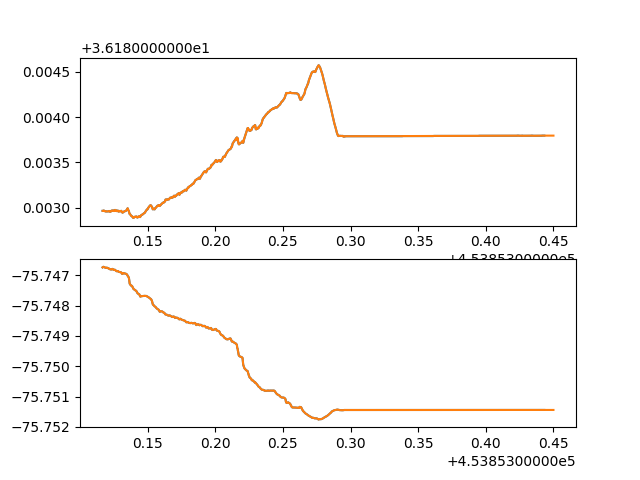

In [37]:
# Interpolate position data to be on the mission time
# Define mission NC
mission_nc_path = '../microSWIFT_data/cleanedDataset/mission_20.nc'

# Load in netCDF file as a dataset
mission_dataset = nc.Dataset(mission_nc_path, mode='a')

# Get list of all microSWIFTs on the mission
microSWIFTs_on_mission = list(mission_dataset.groups.keys())

# Define Sampling Frequency
imu_freq = mission_dataset['imu_freq'][:][0]           # Sampling frequency, units are Hz
imu_time_step = datetime.timedelta(seconds=1/imu_freq) # Time Step between imu samples 
gps_freq = mission_dataset['gps_freq'][:][0]           # Sampling frequency, units are Hz
gps_time_step = datetime.timedelta(seconds=1/gps_freq) # Time Step between gps samples

# Make a time vector for the length of the mission based on the IMU time step
mission_time = np.arange(start_time, end_time, imu_time_step).astype(datetime.datetime)

# # Create time dimension and variable in the netCDF
# time_dimension = mission_dataset.createDimension('time', len(mission_time))
# time_var = mission_dataset.createVariable('time', 'f8', ('time'))
# time_var.units = "hours since 1970-01-01 00:00:00"
# time_var.calendar = "gregorian"
# mission_time_num = nc.date2num(mission_time, units=time_var.units,calendar=time_var.calendar)
# time_var[:] = mission_time_num

print(mission_dataset)

# Define microSWIFT
microSWIFT_num = 'microSWIFT_21'
print(mission_dataset[microSWIFT_num]['GPS'])

# Get GPS data from netCDF
mission_time = mission_dataset['time']
gps_time = mission_dataset[microSWIFT_num]['GPS']['time']
lat = mission_dataset[microSWIFT_num]['GPS']['lat']
lon = mission_dataset[microSWIFT_num]['GPS']['lon']
xFRF = mission_dataset[microSWIFT_num]['GPS']['x_frf']
yFRF = mission_dataset[microSWIFT_num]['GPS']['y_frf']

# Linearly Interpolate each time series onto the mission time array
# Latitude
lat_interp_func = interpolate.interp1d(gps_time, lat, fill_value='extrapolate')
lat_interpolated = lat_interp_func(mission_time)
# Longitude
lon_interp_func = interpolate.interp1d(gps_time, lon, fill_value='extrapolate')
lon_interpolated = lon_interp_func(mission_time)
# Fill all values outside of the first and last measurements with NaNs
first_ind = 

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(gps_time, lat)
ax1.plot(mission_time, lat_interpolated)
ax2.plot(gps_time, lon)
ax2.plot(mission_time, lon_interpolated)

# Close the dataset
mission_dataset.close()

2393.5
162.83890305217216
3500.0
2.0200042127501416


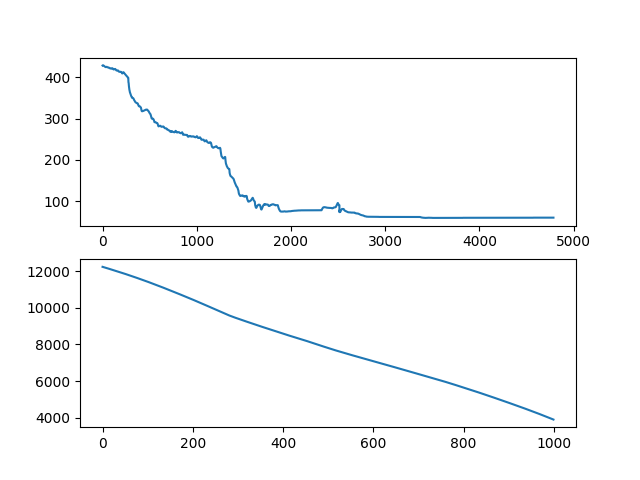

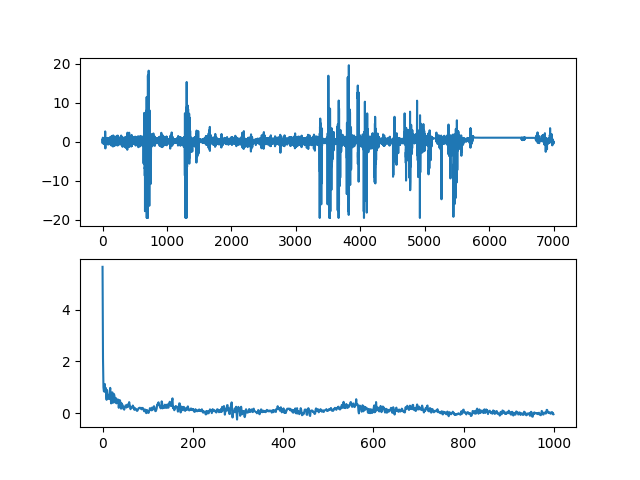

In [92]:
# Compute integral time scale to check that linear interpolation is ok 
# Define an integral time scale function 
def compute_integral_time_scale(data, dt, num_lag_vals):
    # Compute mean of data
    data_mean = np.mean(data)

    # Compute size of data
    N = len(data) - 1

    # Define lag array
    k = np.arange(num_lag_vals)  # lag value
    
    # Compute Autocovariance
    autocovariance = np.zeros(len(k))
    for k_val in k:

        autocovariance_component = 0
        for i in np.arange(0, N-k_val):
            autocovariance_component += ((data[i] - data_mean) * (data[i+k_val] - data_mean))
 
        # rescale the autocovariance sum by the scale factor
        autocovariance[k_val] = (1/(N-1-k_val))*autocovariance_component 

    # Integrate autocovaraince function
    autocovariance_integrated = np.sum(autocovariance * dt)

    # Compute total variance
    total_variance = np.var(data)

    integral_time_scale = autocovariance_integrated / total_variance
    return integral_time_scale, autocovariance

# Compute Integral Time scale for GPS data
# Define mission NC
mission_nc_path = '../microSWIFT_data/cleanedDataset/mission_20.nc'

# Load in netCDF file as a dataset
mission_dataset = nc.Dataset(mission_nc_path, mode='a')

# Define data
data = mission_dataset['microSWIFT_22']['GPS']['x_frf'][:]
N = len(data)
print(N/2)
num_lag_vals = 1000
dt = 1/mission_dataset['gps_freq'][0]

integral_time_scale, autocovaraince = compute_integral_time_scale(data, dt, num_lag_vals)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(data)
ax2.plot(autocovaraince) 
print(integral_time_scale)

# Define data
data = mission_dataset['microSWIFT_22']['IMU']['accel_x'][:7000]
N = len(data)
print(N/2)
num_lag_vals = 1000
dt = 1/mission_dataset['imu_freq'][0]

integral_time_scale, autocovaraince = compute_integral_time_scale(data, dt, num_lag_vals)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(data)
ax2.plot(autocovaraince) 
print(integral_time_scale)

Since the integral time scale is so long ~150 seconds, interpolating onto the imu time vector is reasonable so each GPS signal will be upsampled to 12 Hz from the 4 Hz sampling rate using linear interpolation.

In [78]:
mission_dataset['microSWIFT_24']['GPS']

<class 'netCDF4._netCDF4.Group'>
group /microSWIFT_24/GPS:
    dimensions(sizes): time(4801), gps_velocity_time(19067)
    variables(dimensions): float64 time(time), float64 lat(time), float64 lon(time), float64 z(time), float64 x_frf(time), float64 y_frf(time), float64 gps_vel_time(gps_velocity_time), float64 u(gps_velocity_time), float64 v(gps_velocity_time)
    groups: 